<a href="https://colab.research.google.com/github/bongkyunSON/Deep_Leaning/blob/main/Prophet_base_221211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prophet base Model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [2]:
#read the data in a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/prophet_강의/Part 1 데모용/AMAZON_stock.csv')
print(df.shape)

(1259, 7)


In [3]:
# make a new column with logarithmic values closing price
df['log_close'] = np.log(df['Close'])

In [4]:
# make stationary using series differencing
amazon= df[['Date', 'log_close']]  # new dataframe with selected columns only
amazon_sarimax = df[['Date','log_close']]
amazon['diff_log_close'] = amazon['log_close'].diff().dropna()  
amazon_diff = amazon[['Date','diff_log_close']] 

<ipython-input-4-9a6485776a48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['diff_log_close'] = amazon['log_close'].diff().dropna()


In [5]:
# process the dataframes for different models
amazon_sarimax = df[['Date','log_close']]
amazon_prophet = df[['Date','log_close']]
amazon.drop('diff_log_close', axis=1, inplace=True)
amazon.set_index('Date', inplace=True)  # set the date column as index
amazon_diff.set_index('Date', inplace=True)
amazon_diff.dropna(inplace=True)
amazon_diff

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,diff_log_close
Date,
2017-05-22,0.011220
2017-05-23,0.000896
2017-05-24,0.009027
2017-05-25,0.013204
2017-05-26,0.002413
...,...
2022-05-12,0.014682
2022-05-13,0.055695
2022-05-16,-0.020053


In [6]:
amazon

,log_close
Date,
2017-05-19,6.866767
2017-05-22,6.877987
2017-05-23,6.878882
2017-05-24,6.887910
2017-05-25,6.901113
...,...
2022-05-12,7.667911
2022-05-13,7.723607
2022-05-16,7.703554


In [9]:
# restructure the data
amazon_prophet = amazon.reset_index()
amazon_prophet

,Date,log_close
0,2017-05-19,6.866767
1,2017-05-22,6.877987
2,2017-05-23,6.878882
3,2017-05-24,6.887910
4,2017-05-25,6.901113
...,...,...
1254,2022-05-12,7.667911
1255,2022-05-13,7.723607
1256,2022-05-16,7.703554
1257,2022-05-17,7.743864


In [10]:
# rename the dataframe column
amazon_prophet.columns = ['ds', 'y']
amazon_prophet

,ds,y
0,2017-05-19,6.866767
1,2017-05-22,6.877987
2,2017-05-23,6.878882
3,2017-05-24,6.887910
4,2017-05-25,6.901113
...,...,...
1254,2022-05-12,7.667911
1255,2022-05-13,7.723607
1256,2022-05-16,7.703554
1257,2022-05-17,7.743864


In [12]:
m = Prophet()

In [13]:
#fit the model to the time series data
m.fit(amazon_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvwazky/lexpcmc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvwazky/79fz074v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52006', 'data', 'file=/tmp/tmprpvwazky/lexpcmc1.json', 'init=/tmp/tmprpvwazky/79fz074v.json', 'output', 'file=/tmp/tmprpvwazky/prophet_modelpby0b2a2/prophet_model-20221211063752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:37:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:37:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=30) # make future dataframe

In [17]:
# make forecast for the future
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-19,6.962453,6.822585,6.934648,6.962453,6.962453,-0.085126,-0.085126,-0.085126,0.019735,0.019735,0.019735,-0.104861,-0.104861,-0.104861,0.0,0.0,0.0,6.877327
1,2017-05-22,6.958799,6.824508,6.930662,6.958799,6.958799,-0.083297,-0.083297,-0.083297,0.018625,0.018625,0.018625,-0.101922,-0.101922,-0.101922,0.0,0.0,0.0,6.875502
2,2017-05-23,6.957581,6.822784,6.939501,6.957581,6.957581,-0.077769,-0.077769,-0.077769,0.022330,0.022330,0.022330,-0.100098,-0.100098,-0.100098,0.0,0.0,0.0,6.879812
3,2017-05-24,6.956362,6.830429,6.936593,6.956362,6.956362,-0.075371,-0.075371,-0.075371,0.022553,0.022553,0.022553,-0.097924,-0.097924,-0.097924,0.0,0.0,0.0,6.880992
4,2017-05-25,6.955144,6.829898,6.939084,6.955144,6.955144,-0.072932,-0.072932,-0.072932,0.022517,0.022517,0.022517,-0.095449,-0.095449,-0.095449,0.0,0.0,0.0,6.882213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,2022-06-13,7.927703,7.835909,7.949826,7.924930,7.933473,-0.036305,-0.036305,-0.036305,0.018625,0.018625,0.018625,-0.054930,-0.054930,-0.054930,0.0,0.0,0.0,7.891399
1285,2022-06-14,7.927076,7.840261,7.946855,7.923532,7.933674,-0.032140,-0.032140,-0.032140,0.022330,0.022330,0.022330,-0.054470,-0.054470,-0.054470,0.0,0.0,0.0,7.894936
1286,2022-06-15,7.926449,7.842265,7.952928,7.922209,7.933480,-0.031512,-0.031512,-0.031512,0.022553,0.022553,0.022553,-0.054065,-0.054065,-0.054065,0.0,0.0,0.0,7.894937
1287,2022-06-16,7.925822,7.839134,7.949426,7.921195,7.933213,-0.031152,-0.031152,-0.031152,0.022517,0.022517,0.022517,-0.053669,-0.053669,-0.053669,0.0,0.0,0.0,7.894670


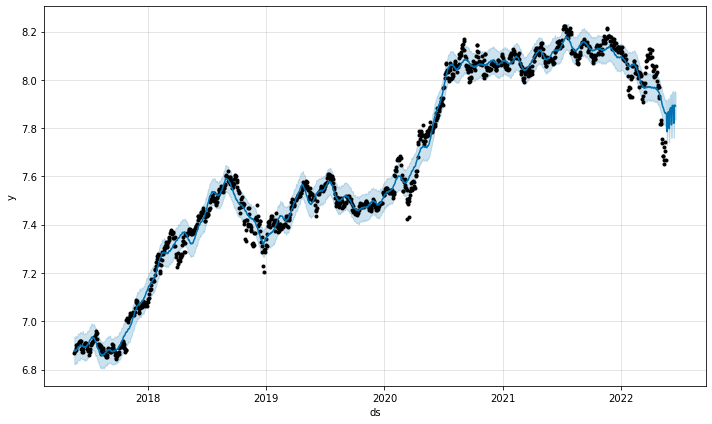

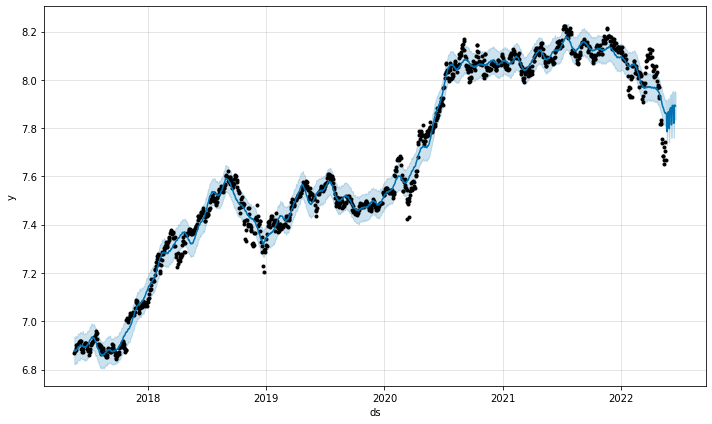

In [19]:
# plot the forecast
m.plot(forecast)

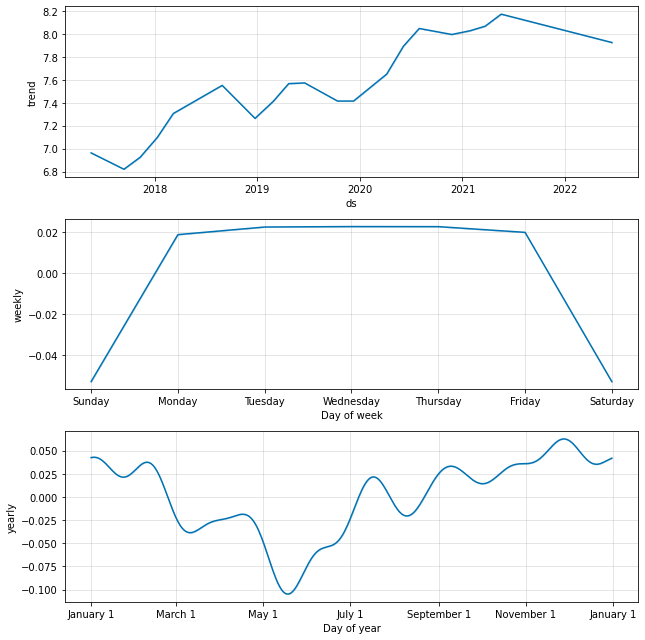

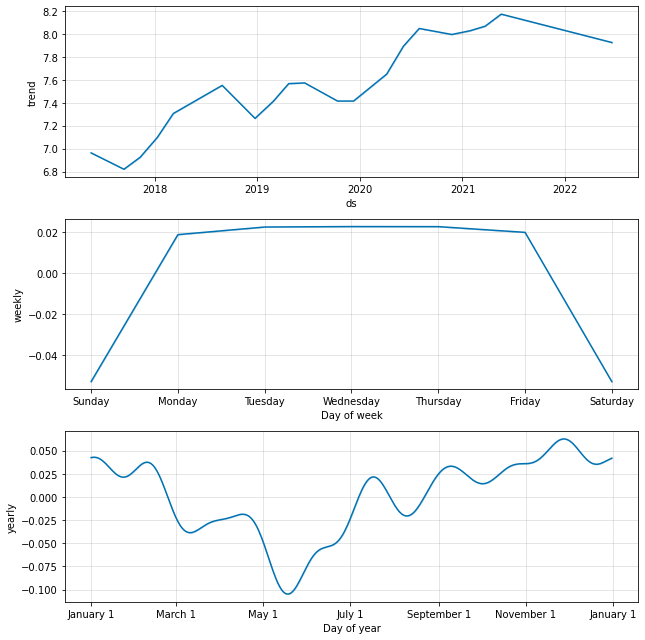

In [20]:
# component plots
m.plot_components(forecast)


# 토요일, 일요일 주식시장이 쉬기때문에 0이다
# 5월 ~ 6월이 낮은 이유는 배당시즌이라 배당을 받으려면 1년 동안 기다려야 하기 때문에 상대적으로 가격이 낮다